In [109]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

# Load the OpenFlights airports dataset
columnNames = ['Name', 'City', 'Country', 'IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz','Type','Source']
airports_df = pd.read_csv('airports.dat',names=columnNames, index_col=0)  # Replace 'airports.dat' with the actual path to the OpenFlights airports dataset


airports_df = airports_df.replace('\\N', pd.NA).dropna()
airports_df['Timezone'] = airports_df['Timezone'].astype(float)
us_df = airports_df[airports_df['Timezone']>-7]
us_df = airports_df[airports_df['Timezone']<-3]

2068


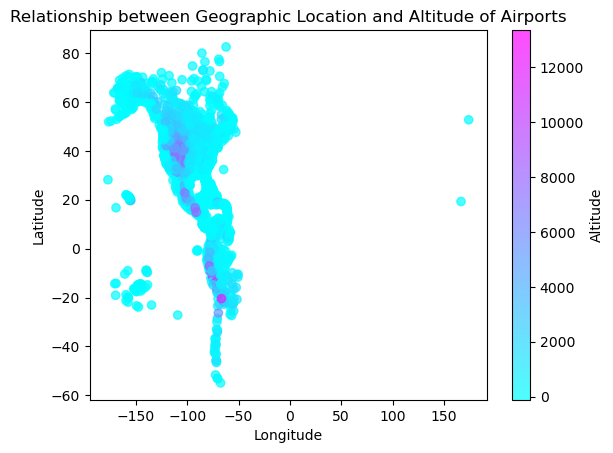

In [110]:

filtered_df = us_df[['Latitude', 'Longitude', 'Altitude']]
print(filtered_df.index.size)
# Remove rows with missing values (if any)
filtered_df = filtered_df.dropna()

# Convert latitude, longitude, and altitude to numeric
filtered_df['Latitude'] = pd.to_numeric(filtered_df['Latitude'], errors='coerce')
filtered_df['Longitude'] = pd.to_numeric(filtered_df['Longitude'], errors='coerce')
filtered_df['Altitude'] = pd.to_numeric(filtered_df['Altitude'], errors='coerce')

# Scatter plot to visualize the relationship between latitude, longitude, and altitude
plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], c=filtered_df['Altitude'], cmap='cool', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relationship between Geographic Location and Altitude of Airports')
plt.colorbar(label='Altitude')
plt.show()




In [124]:
X = us_df[['Latitude', 'Longitude']]
y = us_df['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9154589371980676


/Users/masato/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='linear')

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.7874396135265701
                                  precision    recall  f1-score   support

             Antigua and Barbuda       0.00      0.00      0.00         1
                           Aruba       0.00      0.00      0.00         1
                         Bahamas       0.12      0.33      0.18         6
                          Belize       0.00      0.00      0.00         1
                         Bolivia       0.67      0.80      0.73         5
                          Brazil       0.83      0.71      0.77         7
          British Virgin Islands       0.00      0.00      0.00         1
                          Canada       0.86      0.70      0.77        63
                           Chile       1.00      1.00      1.00         5
                        Colombia       0.68      0.81      0.74        16
                    Cook Islands       0.00      0.00      0.00         1
                      Costa Rica       0.50      1.00      0.67         5
  

/Users/masato/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/masato/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/masato/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
svm = SVC(kernel='sigmoid')

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.47342995169082125


In [127]:
svm = SVC(kernel='rbf')

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.8236714975845411


In [128]:
svm = SVC(kernel='poly', degree=3)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.7922705314009661


/Users/masato/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/masato/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

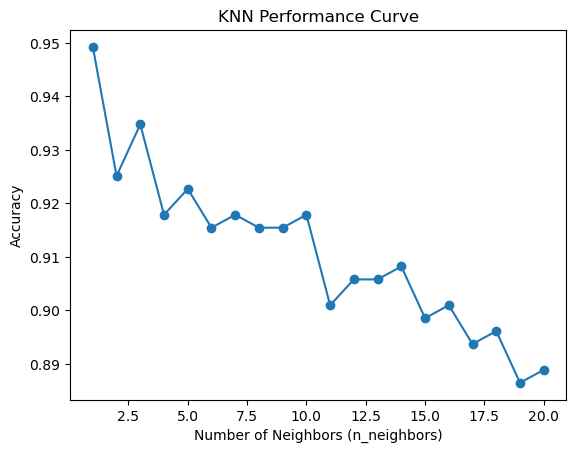

In [129]:
n_neighbors_range = range(1, 21)  # Set the desired range of n_neighbors values

# Calculate accuracy for different values of n_neighbors
accuracy_scores = []
for n_neighbors in n_neighbors_range:
    # Create a KNN classifier with the current n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the performance curve
plt.plot(n_neighbors_range, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Performance Curve')
plt.show()